In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/german_credit_data.csv').drop('Unnamed: 0', axis = 1)

In [3]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
data['date'] = '2022/08/31'

In [5]:
from preprocessing import preprocessing

In [6]:
preprocessing(data, NA = 'mean_mode', to_date = 'date', dummies = 'Purpose').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1000 non-null   datetime64[ns]
 1   Sex                  1000 non-null   object        
 2   Housing              1000 non-null   object        
 3   Saving accounts      1000 non-null   object        
 4   Checking account     1000 non-null   object        
 5   business             1000 non-null   uint8         
 6   car                  1000 non-null   uint8         
 7   domestic appliances  1000 non-null   uint8         
 8   education            1000 non-null   uint8         
 9   furniture/equipment  1000 non-null   uint8         
 10  radio/TV             1000 non-null   uint8         
 11  repairs              1000 non-null   uint8         
 12  vacation/others      1000 non-null   uint8         
 13  Age                  1000 non-null

In [7]:
data_num = data.select_dtypes(include=np.number) #only numerical columns
data_cat = data.drop(data_num.columns, axis = 1)

In [8]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

from sklearn.ensemble import RandomForestClassifier

In [9]:
path = './data/german_raw.csv'
df = pd.read_csv(path)
df.head()

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,...,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,Male,0,1,67,6,Electronics,1169,4,4,...,0,0,0,0,1,0,0,0,1,1
1,-1,Female,0,0,22,48,Electronics,5951,2,2,...,0,0,0,0,1,0,0,0,0,1
2,1,Male,0,1,49,12,Education,2096,2,3,...,0,0,0,0,1,0,0,0,1,0
3,1,Male,0,1,45,42,Furniture,7882,2,4,...,0,0,0,1,0,0,0,0,1,1
4,-1,Male,0,1,53,24,NewCar,4870,3,4,...,0,0,0,0,0,0,0,0,0,1


In [10]:
clf = RandomForestClassifier()

X = preprocessing(df.drop('GoodCustomer', axis = 1), NA = 'mean_mode', normalization=True, norm_type='norm', dummies = 'all').dropna(axis = 1)
y = df['GoodCustomer']

In [11]:
clf.fit(X, y)

RandomForestClassifier()

In [12]:
partial_dependence(clf, X=X.sample(100), features=[14,16],
                   kind = 'average')['average'][0]

array([[0.6003, 0.6003, 0.5953, ..., 0.469 , 0.4687, 0.469 ],
       [0.604 , 0.604 , 0.599 , ..., 0.4709, 0.4701, 0.4704],
       [0.6031, 0.6031, 0.5982, ..., 0.4596, 0.4588, 0.4533],
       ...,
       [0.7014, 0.7014, 0.6958, ..., 0.5144, 0.5079, 0.4987],
       [0.6925, 0.6925, 0.6869, ..., 0.5077, 0.5012, 0.4927],
       [0.6894, 0.6894, 0.6838, ..., 0.5038, 0.4989, 0.4904]])

<Figure size 2000x2000 with 0 Axes>

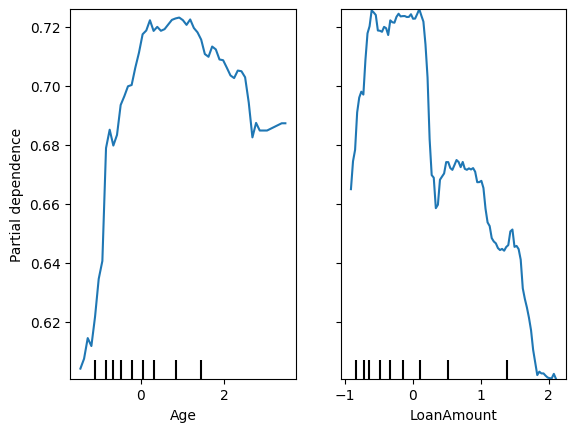

In [13]:
plt.figure(figsize = (20,20))
features = [14, 16] #cada número representa uma feature 
PartialDependenceDisplay.from_estimator(clf, X, features)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.ensemble import RandomForestRegressor

In [15]:
feature = 'LoanAmount'
feature = 'Age'

pd_results = partial_dependence(
    clf, X, features=feature, kind="average")
#display = PartialDependenceDisplay(
#    [pd_results], features=features, feature_names=feature_names,
#    target_idx=0, deciles=deciles
#)

In [16]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'PurposeOfLoan_Business',
       'PurposeOfLoan_Education', 'PurposeOfLoan_Electronics',
       'PurposeOfLoan_Furniture', 'PurposeOfLoan_HomeAppliances',
       'PurposeOfLoan_NewCar', 'PurposeOfLoan_Other', 'PurposeOfLoan_Repairs',
       'PurposeOfLoan_Retraining', 'PurposeOfLoan_UsedCar', 'ForeignWorker',
       'Single', 'Age', 'LoanDuration', 'LoanAmount',
       'LoanRateAsPercentOfIncome', 'YearsAtCurrentHome',
       'NumberOfOtherLoansAtBank', 'NumberOfLiableIndividuals', 'HasTelephone',
       'CheckingAccountBalance_geq_0', 'CheckingAccountBalance_geq_200',
       'SavingsAccountBalance_geq_100', 'SavingsAccountBalance_geq_500',
       'MissedPayments', 'NoCurrentLoan', 'CriticalAccountOrLoansElsewhere',
       'OtherLoansAtBank', 'HasCoapplicant', 'HasGuarantor', 'OwnsHouse',
       'RentsHouse', 'Unemployed', 'YearsAtCurrentJob_lt_1',
       'YearsAtCurrentJob_geq_4', 'JobClassIsSkilled'],
      dtype='object')

In [17]:
df[feature]

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: Age, Length: 1000, dtype: int64

In [18]:
pdp_df = pd.DataFrame({'grid_values': pd_results['values'][0], 'average': pd_results['average'][0]})
pdp_dict = pdp_df.to_dict(orient='records')

#x_start = min(df[feature].min(), pdp_df['grid_values'].min())
#x_end = max(df[feature].max(), pdp_df['grid_values'].max())

x_start = pdp_df['grid_values'].min()
x_end = pdp_df['grid_values'].max()


In [19]:
df.head()

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,...,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,Male,0,1,67,6,Electronics,1169,4,4,...,0,0,0,0,1,0,0,0,1,1
1,-1,Female,0,0,22,48,Electronics,5951,2,2,...,0,0,0,0,1,0,0,0,0,1
2,1,Male,0,1,49,12,Education,2096,2,3,...,0,0,0,0,1,0,0,0,1,0
3,1,Male,0,1,45,42,Furniture,7882,2,4,...,0,0,0,1,0,0,0,0,1,1
4,-1,Male,0,1,53,24,NewCar,4870,3,4,...,0,0,0,0,0,0,0,0,0,1


In [20]:
pdp_df.tail()

,grid_values,average
48,2.765073,0.68741
49,2.852981,0.68483
50,3.028798,0.68483
51,3.380432,0.68729
52,3.468341,0.68729


In [21]:
import os
os.chdir('./dash_interface/')
from my_dash_components import ScatterplotComponent, LinearplotComponent, HistogramplotComponent, LinearHistComponent
from dash import dcc, html, Input, Output
import pandas as pd
from jupyter_dash import JupyterDash
hostId = 0
def getHost():
    global hostId
    hostId += 1
    return '127.0.0.' + str(hostId)

In [22]:
app = JupyterDash(__name__)

app.layout = html.Div([
    LinearplotComponent(
        id='linear',
        data=pdp_dict,
        x_axis='grid_values',
        y_axis='average',
        xStart=x_start,
        xEnd=x_end,
    ),
    HistogramplotComponent(
        id='hist',
        data=df.to_dict(orient='records'),
        value=feature,
        xStart=x_start,
        xEnd=x_end,
    ),
    html.Div(id='output')
])

clickedValue = ""
@app.callback(
    Output("output", "children"), 
    Input("linear", "value"))
def showDataPoint(value):
    global clickedValue
    clickedValue = value
    return value

if __name__ == '__main__':
    #app.run(mode="jupyterlab")
    #app.run_server(mode='inline')
    app.run_server(mode="inline", host=getHost())

    #verifica o gridvalues e verificar o value do histograma


Dash is running on http://127.0.0.1:8050/



In [23]:
app = JupyterDash(__name__)

app.layout = html.Div([
    LinearHistComponent(
        id='linear-hist',
        data=pdp_dict,
        histData=X.to_dict(orient='records'),
        x_axis='grid_values',
        y_axis='average',
        histValue=feature
    ),
])


app.run_server(mode="inline", host=getHost())

Dash is running on http://127.0.0.2:8050/



In [1]:
dict(
                    x=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
                    2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
                    y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270,
                    299, 340, 403, 549, 499],
                    name='China',
                    marker=dict(
                        color='rgb(26, 118, 255)'
                    )
                )

{'x': [1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012],
 'y': [16,
  13,
  10,
  11,
  28,
  37,
  43,
  55,
  56,
  88,
  105,
  156,
  270,
  299,
  340,
  403,
  549,
  499],
 'name': 'China',
 'marker': {'color': 'rgb(26, 118, 255)'}}